# Project: Wrangling and Analyze Data

## Data Gathering


In [67]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df1=pd.read_csv('twitter-archive-enhanced.csv')

 Used Requests library to download the tweet image prediction (image_predictions.tsv)

In [68]:
response=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)
    
df2=pd.read_csv('image-predictions.tsv',delimiter='\t')    


In [69]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

'''
txt_file=open('tweet_json.txt','w')
#txt_file.write('tweet_id retweet_count favorite_count''\n')
for tweet_id in df1.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        retweet_count=tweet_info.retweet_count
        print(tweet_id)
        favorite_count=tweet_info.favorite_count
        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  
    except Exception as e:
        print('error')
txt_file.close()
'''


"\ntxt_file=open('tweet_json.txt','w')\n#txt_file.write('tweet_id retweet_count favorite_count''\n')\nfor tweet_id in df1.tweet_id:\n    try:\n        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')\n        retweet_count=tweet_info.retweet_count\n        print(tweet_id)\n        favorite_count=tweet_info.favorite_count\n        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  \n    except Exception as e:\n        print('error')\ntxt_file.close()\n"

In [70]:

json_file='tweet-json.txt'
df = pd.read_json(json_file, lines=True)
df3=df[['id','retweet_count','favorite_count']]
 

## Assessing Data



### Visual Assesment

In [71]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [72]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
df3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Programmatic Assesment

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Observing the data

In [75]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Checking for duplicated values of tweet id

In [76]:
df1.tweet_id.duplicated().sum()

0

##### Checking if the denominator value is consistent across all the records.

In [77]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

##### Looking for the number of records which dont have the rating_denominator as 10

In [78]:
df1[df1['rating_denominator']>10]['rating_denominator'].sum()

1294

In [79]:
df1.duplicated().sum()

0

In [14]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
909,757725642876129280,NaN,NaN,2016-07-25 23:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757725642...,11,10,Beckham,None,None,None,None
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,None,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,None,None,None,None


##### Checking for number of observations with rating of numerator above 20

In [15]:
sum(df1['rating_numerator']>20)

24

In [16]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [81]:
df2.duplicated().sum()

0

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
1. Change timestamp to datetime in df1 and Define new columns for year,month and day and drop timestamp

2. Rating of denomenator should be standardized to 10

3. There are incorrect numerator values hence correct all values above 20

4. We want only original ratings that have images hence we dont need data from retweet columns

5. Replace name of the column from text to tweet in df2

6. Change the erroneous data under column 'name' 

7. Remove duplicated images from jpg_url(df2) 

8. Rename column of df3 id to tweet_id 

9. missing values from (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id  
    ,retweeted_status_timestamp)  - if cols are insignificant they can be removed 



### Tidiness issues
 
 1.Create a colum Stage and delete doggo,floofer ,pupper,puppo
 
 2.All the dataframes are merged into one single master dataframe called data for better analysis.  

## Cleaning Data


In [19]:
# Make copies of original pieces of data
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

### Tidiness issues

#### Define: Create a colum Stage and delete doggo,floofer ,pupper,puppo.                        

#### Code

In [20]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.stage=df1_clean.stage.replace('',np.nan) 

In [21]:
abc=['doggo','floofer','pupper','puppo','']
dele=df1_clean[~df1_clean['stage'].isin(abc)]
df1_clean = df1_clean.drop(dele.index)


#### Test

In [22]:
df1_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,pupper
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828381636...,14,10,Doobert,doggo
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,pupper


###  Change timestamp to datetime in df1  and Define new columns for year,month and day and drop timestamp

#### Code

In [23]:
 #convert timestamp to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#extract year, month and day to new columns
df1_clean['year'] = df1_clean['timestamp'].dt.year
df1_clean['month'] = df1_clean['timestamp'].dt.month
df1_clean['weekday'] =df1_clean['timestamp'].dt.day_name()

In [24]:
df1_clean=df1_clean.drop('timestamp',axis=1)

#### Test

In [25]:
list(df1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'year',
 'month',
 'weekday']

### Quality issues

###  Define rating denomenator should be standardized

### Code

In [26]:
df1_clean.rating_denominator.value_counts()

10    366
Name: rating_denominator, dtype: int64

In [27]:
df1_clean.rating_denominator=10

### Test

In [28]:
sum(df1_clean.rating_denominator>10)

0

### Define : There are incorrect numerator values hence correct all values above 20 

### Code

In [29]:
 df1_clean.rating_numerator.unique()

array([14, 13, 12, 10, 11,  7,  8, 27,  9,  3,  5,  6])

In [30]:
#iloc -> access rows and columns by row number
#loc -> access rows and columns by index number
for i in range(1,len(df1_clean.rating_numerator),1):
    if df1_clean.rating_numerator.iloc[i] > 20 and df1_clean.rating_numerator.iloc[i]<=200:
        df1_clean.rating_numerator.iloc[i]=df1_clean.rating_numerator.iloc[i]*0.1
    elif df1_clean.rating_numerator.iloc[i] > 200: 
        df1_clean.rating_numerator.iloc[i]=df1_clean.rating_numerator.iloc[i]*0.01

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Test

In [31]:
sum(df1_clean.rating_numerator>20)

0

### Define : We want only original ratings that have images hence we dont need data from retweet columns

### Code

In [32]:
df1_clean=df1_clean[df1_clean['retweeted_status_user_id'].isnull()]

In [33]:
# Delete the columns with reweet and also columns with lot of missing values
df1_clean=df1_clean.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


### Test

In [34]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 9 to 2017
Data columns (total 11 columns):
tweet_id              332 non-null int64
source                332 non-null object
text                  332 non-null object
expanded_urls         326 non-null object
rating_numerator      332 non-null float64
rating_denominator    332 non-null int64
name                  332 non-null object
stage                 332 non-null object
year                  332 non-null int64
month                 332 non-null int64
weekday               332 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 31.1+ KB


###  Define : Change column name  text to tweet

### Code

In [35]:
df1_clean.rename(columns ={'text':'tweet'},inplace=True)

### Test

In [36]:
list(df1_clean)

['tweet_id',
 'source',
 'tweet',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'year',
 'month',
 'weekday']

### Erroneous data under column 'name' 

### Code:

In [37]:
df1_clean['name'].value_counts().sample(4)

Gabe        1
Kona        1
Bayley      1
Ashleigh    1
Name: name, dtype: int64

In [38]:
# replace None and a with nan
df1_clean['name']=df1_clean['name'].replace({'a':np.nan,'None':np.nan})

In [39]:
df1_clean['name']=df1_clean['name'].str.capitalize()

### Test:

In [40]:
df1_clean['name'].value_counts().sample(4)

Abby        1
Jamesy      1
Wally       1
Fletcher    1
Name: name, dtype: int64

###  Define Rename column names

### Code

In [41]:

df2_clean=df2_clean.rename(columns={'p1':'Breed_pred1','p1_conf':'conf_for_pred1','p1_dog':'isdog_pred1',
                          'p2':'Breed_pred2','p2_conf':'conf_for_pred2','p2_dog':'isdog_pred2',
                          'p3':'Breed_pred3','p3_conf':'conf_for_pred3','p3_dog':'isdog_pred3'})


### Test

In [42]:
list(df2_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'Breed_pred1',
 'conf_for_pred1',
 'isdog_pred1',
 'Breed_pred2',
 'conf_for_pred2',
 'isdog_pred2',
 'Breed_pred3',
 'conf_for_pred3',
 'isdog_pred3']

### Define : Remove duplicated images from jpg_url

In [43]:
sum(df2_clean.jpg_url.duplicated())

66

In [44]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
Breed_pred1       2075 non-null object
conf_for_pred1    2075 non-null float64
isdog_pred1       2075 non-null bool
Breed_pred2       2075 non-null object
conf_for_pred2    2075 non-null float64
isdog_pred2       2075 non-null bool
Breed_pred3       2075 non-null object
conf_for_pred3    2075 non-null float64
isdog_pred3       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
df2_clean=df2_clean.drop_duplicates(subset=['jpg_url'],keep='first')

In [46]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_pred1,conf_for_pred1,isdog_pred1,Breed_pred2,conf_for_pred2,isdog_pred2,Breed_pred3,conf_for_pred3,isdog_pred3
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1752,824325613288833024,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,True,Cardigan,0.008919,True,basenji,0.000262,True
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_terrier,0.907990,True,silky_terrier,0.076883,True,Australian_terrier,0.008473,True
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True


### Rename column of df3 id to tweet_id 

### Code

In [47]:
df3_clean=df3_clean.rename(columns={'id':'tweet_id'})

### Test

In [48]:
list(df3_clean)

['tweet_id', 'retweet_count', 'favorite_count']

### Merge all the dataframes

### Code

In [49]:
#pd.merge(df3_clean,df1_clean,how='inner',left_on='tweet_id', right_on='tweet_id', left_index=False, right_index=False
data1=pd.merge(df1_clean,df2_clean)

In [50]:
data=pd.merge(data1,df3_clean)

### Test

In [51]:
list(data1)


['tweet_id',
 'source',
 'tweet',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'year',
 'month',
 'weekday',
 'jpg_url',
 'img_num',
 'Breed_pred1',
 'conf_for_pred1',
 'isdog_pred1',
 'Breed_pred2',
 'conf_for_pred2',
 'isdog_pred2',
 'Breed_pred3',
 'conf_for_pred3',
 'isdog_pred3']

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
data['rating']=data['rating_numerator']/data['rating_denominator']
data=data.drop(['rating_numerator','rating_denominator'],axis=1) 

In [53]:
data.to_csv('tw_analysis.csv',index=False)

## Analyzing and Visualizing Data
 

In [54]:
data=pd.read_csv('tw_analysis.csv')
list(data)

['tweet_id',
 'source',
 'tweet',
 'expanded_urls',
 'name',
 'stage',
 'year',
 'month',
 'weekday',
 'jpg_url',
 'img_num',
 'Breed_pred1',
 'conf_for_pred1',
 'isdog_pred1',
 'Breed_pred2',
 'conf_for_pred2',
 'isdog_pred2',
 'Breed_pred3',
 'conf_for_pred3',
 'isdog_pred3',
 'retweet_count',
 'favorite_count',
 'rating']

In [55]:
data[['retweet_count','favorite_count','rating']].describe()

,retweet_count,favorite_count,rating
count,295.000000,295.000000,295.000000
mean,3748.928814,11009.630508,1.100915
std,7510.195410,16579.983328,0.180312
min,103.000000,693.000000,0.270000
25%,835.000000,2693.500000,1.000000
50%,1704.000000,5281.000000,1.100000
75%,3665.000000,12493.500000,1.200000
max,79515.000000,132810.000000,1.400000


### Most popular dog breed in Prediction1

In [56]:
q1=data[['Breed_pred1','Breed_pred2','Breed_pred3']]
x1=q1['Breed_pred1'].value_counts()[:10] 
x1 

golden_retriever      28
Labrador_retriever    15
Pembroke              13
Pomeranian             9
pug                    8
Chihuahua              7
German_shepherd        7
Samoyed                6
Lakeland_terrier       6
Eskimo_dog             5
Name: Breed_pred1, dtype: int64

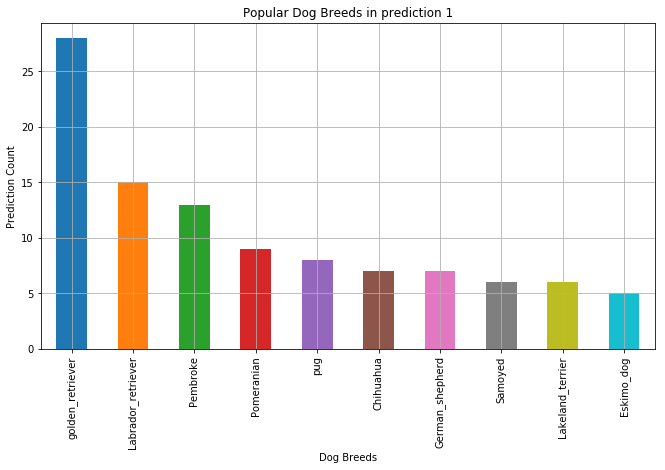

In [57]:
plt.figure(figsize = (11,6))
ax=x1.plot(kind='bar',grid=True)
plt.xlabel("Dog Breeds" );
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in prediction 1");

### Did the retweets increase as favourites increase ?

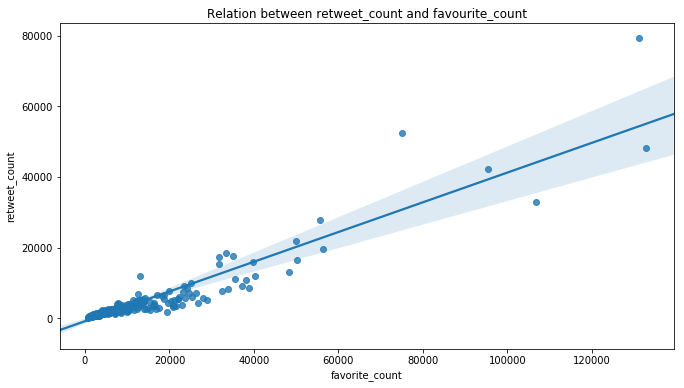

In [64]:
#list(data)
plt.figure(figsize=[11, 6])
sns.regplot(x=data['favorite_count'],y=data['retweet_count'])
#data.plot.scatter(x='favorite_count',y='retweet_count',figsize=(11,6))
plt.title("Relation between retweet_count and favourite_count");


From the above plot, we can conclude that there is a positive linear correlation between these two variables.As favourite count increase, retweets also increase! 

### Which stage of the dog got more retweets and favourites?

Text(0.5,1,'Average number of favourite and retweet according to the stages of dog')

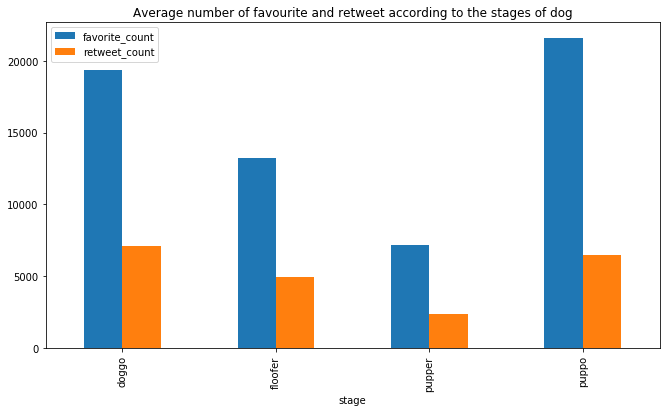

In [59]:
data.groupby('stage')['favorite_count','retweet_count'].mean().plot(kind='bar',figsize=(11,6))
plt.title("Average number of favourite and retweet according to the stages of dog")

Puppo seem to be the one with more number of retweets and favourite.Hence the highest ratings too.

Text(0.5,1,'Average of rating as per the stages of dog')

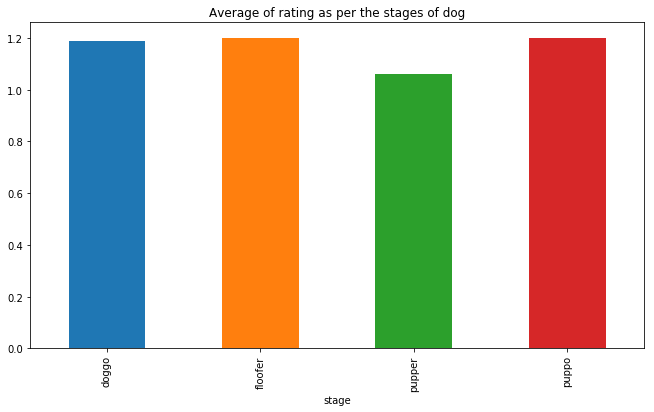

In [60]:
data.groupby('stage')['rating'].mean().plot(kind='bar',figsize=(11,6))
plt.title("Average of rating as per the stages of dog")

### Rating Distribution

Text(0.5,1,'Distribution of rating')

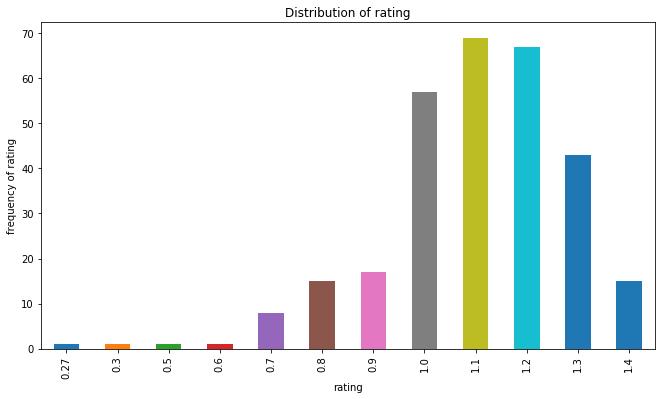

In [61]:
data['rating']=data['rating'].round(decimals=2)
data.groupby('rating')['tweet_id'].count().plot(kind='bar',figsize=(11,6))
plt.ylabel('frequency of rating')
plt.title("Distribution of rating")

Text(0,0.5,'average')

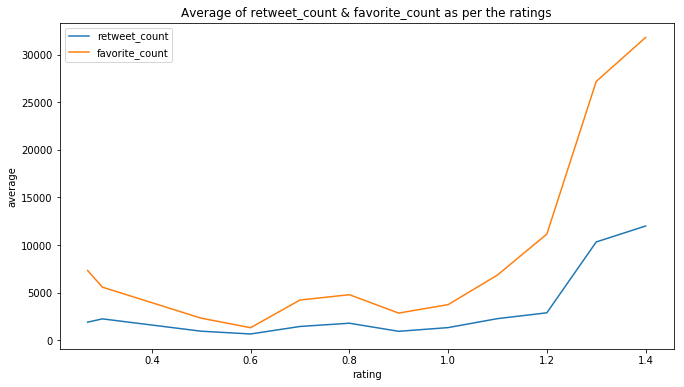

In [62]:
data.groupby('rating')['retweet_count','favorite_count'].mean().plot(figsize=(11,6))
plt.title("Average of retweet_count & favorite_count as per the ratings")
plt.ylabel('average')

### Insights:
1. Based on the distribution above the most popular breed happens to be Golden Retreiver.

2. There is a positive correlation between favorite count and retweet count.

3. Dogs in puppo stage get more retweets and favorite counts.Hence the highest average of rating is also for puppo.

4. Posts with rating 1.4 gets highest retweets and favorite counts.